# Unsupervised Machine Learning

## Anomaly Detection

___

![](http://3.bp.blogspot.com/-AEVC_RU59Kg/UxVY7UxaUyI/AAAAAAAAEQ4/DpDMVAr2U8E/s1600/1378694278.jpg)

---

# I. What is anomaly detection?

## I.1. Examples of anomaly detection problems

Many problems in real life aim at detecting anomalies, for instance :

- in the industry, given test results (vibration tests, heat tests, etc.) of newly created planes, does an aircraft present any flaw ?

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1_2qKP_fbaegpESoN_VR1w1CzHIrBaHFz">
</p>

- in the financial sector, amongst all the transactions processed, can we identify any fraudulent transaction ongoing ?

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Ka-n75C5pfcM48MA8uXZz9JbbpeEWWla">
</p>

- in the IT industry, according to server logs, can we detect any malfunction, overloading, unusual server activity ? Features would be for example CPU load, memory usage, network traffic, etc.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1tcWyMx0-MD46X-16jyXUFYubUPo2eAau">
</p>

- in manufacturing industry, can we automate visual quality inspection by detecting anomalies on the faulty pieces ?


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1COZKHR6q0F5slSvEmuNtYBPknFEEJLTD" width="600px">
</p>

- in cybersecurity, based on user activity on a website (number of visited pages, typing speed, etc. ), can we flag unusual users or bots ?

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1MOdiOAeV859E85hAFVWgmIBC1jf4uIEk">
</p>

---

## I.2. The problem : highly imbalanced datasets

Usual supervised  approaches (classifying anomaly *vs* normal behavior) can be challenging in anomaly detection problems because the data is most often **largely imbalanced**.

> 🔦 **Hint**: Since anomalies are supposedly **rare events**, it's often **difficult to obtain large amounts of labeled anomalies**. So the labeled data consists mostly of normal events.

➡️ As a consequence, we need to come up with new approaches to tackle this problem:
- option 1 : moving back to a **supervised problem** using **undersampling** or **oversampling** techniques.
- option 2 : treating the dataset as an **unsupervised problem** (i.e. without labels) and trying to identify anomalies as **outliers** (compared to the normal data points). This approach is used in many cases.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=157HwFbO540ogl3NG7TLi6SxIsgxskycq" width="400px" >
</p>

## I.3. Unsupervised Anomaly Detection

There are many unsupervised algorithms that aim at detecting anomalies : we will unveil some of the most popular.

Results will vary depending on the model we choose and it is part of our job to test different algorithms and to have a good sense of our data distribution in order to make the best choice.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1KwoRBTIOXD8rt_dKZzs4IyfFYXyNgjU8" width="600px">
</p>


---

# II. Gaussian distribution based

## II.1. Intuition 

Imagine you collect two test measures (heating and pressure resistance) of an aircraft piece after fabrication.

Let's visualize the distribution of the normal pieces we tested:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1KNZ-1li7WVqpLXMT3FBQMKobdSolnJR2" width="300px">
</p>


We would presume, that if a new aircraft piece is being made with test measures far from those previously collected, the chance are high that this new piece is an anomaly.

Using probability laws to modelize our data, we can compute the probability of any new given point and conclude on whether we consider it as an anomaly or not.

## II.2. Mathematics

This is how the Gaussian distribution based algorithm works: based on the existing data distribution, we modelize each selected feature $x_i$ by a Normal law (bell curve)

$$P(x_i,\mu_i,\sigma_i) =  {e} ^{-{\frac {1}{2}}\left({\frac {x_i-\mu_i }{\sigma_i }}\right)^{2}} $$

> 🔦 **Hint**: For each feature $i$, the model learns two parameters: ${\mu_i }$ the mean and ${\sigma_i}$ the standard deviation of the normal law.

So that the probability of a point $x$ is given by the multiplication of those distributions:

$$P(x) = \prod_i P(x_i,\mu_i,\sigma_i) $$

👉🏻 Finally, for a new datapoint $x_{test}$, we can flag the point as **normal** if the probability is "high enough" or flag it as an **anomaly** if the probability is "too small".

To do so, we define an hyperparameter $\epsilon$ (ex: 0.2), corresponding to the **anomaly threshold**:

* if $P(x_{test}) < \epsilon$: then this point is classified as an anomaly
* if $P(x_{test}) \geq \epsilon$: then this point is classified normal

The value of $\epsilon$ has to be defined properly on the validation dataset to maximize the chosen evaluation metrics.

## II.3. Implementation with `sklearn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EllipticEnvelope

In [2]:
# generate data
n_samples = 125
n_outliers = 25
n_features = 2

gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)

# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [3]:
cov = EllipticEnvelope(random_state=0).fit(X)
# predict returns 1 for an inlier and -1 for an outlier
labels = cov.predict(X)

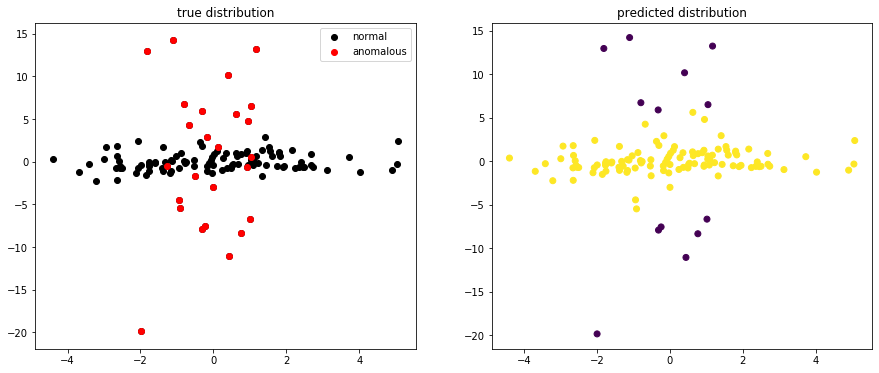

In [4]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.scatter(X[:,0], X[:,1], c='black', label='normal')
plt.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:], c='red', label='anomalous')
plt.legend()
plt.title('true distribution')
fig.add_subplot(122)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('predicted distribution')
plt.show()

# III. Local Outlier Factor (LOF)

## III.1. Intuition

Another efficient way to perform outlier detection is the **Local Outlier Factor (LOF)** algorithm. It computes a **score** (called Local Outlier Factor) reflecting the **degree of abnormality of the observations** : it is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

👉🏻 A normal instance is expected to have a local density similar to its neighbors, while abnormal data are expected to have a much smaller local density.
* if LOF $\lesssim$	1 the point is **normal**
* if LOF >> 1 the point is **anomalous** (the point is far from dense areas and, hence, an outlier)

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1UU6QleJknTDgz517YliqpnNXXk7DsZu1">
</p>

> 🔦 **Hint**: The strength of the LOF algorithm is that **it takes both local and global properties** of datasets into consideration. The question is not « how isolated is the sample », but « how isolated is it with respect to the surrounding neighborhood ».

> 🔦 **Hint**: The number of neighbors in an hyperparameter of the model : `n_neighbors=20` appears to work well in general. When the proportion of outliers is high (i.e. greater than 10%), `n_neighbors` should be greater.

> 📚 **Resources**: if you want to dig into the details of the LOF score, have a look at [scikit-learn explanation](https://scikit-learn.org/stable/modules/outlier_detection.html#local-outlier-factor), [this summary on Towards Data Science](https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe) or this [Medium article](https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe).

## III.2. Implementation with `sklearn`

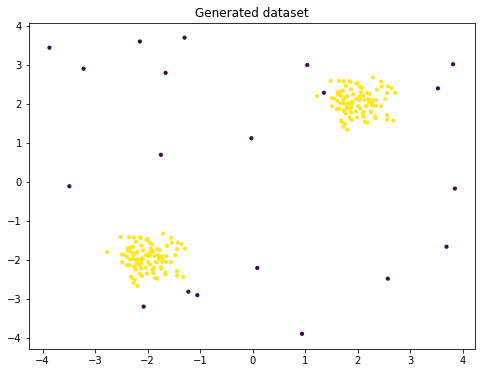

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(0)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
y = np.ones(len(X), dtype=int)
y[-n_outliers:] = -1

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10.)
plt.title("Generated dataset")
plt.show()

In [6]:
# fit the model for outlier detection (default)
lof = LocalOutlierFactor(n_neighbors=20, contamination="auto")
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = lof.fit_predict(X)
n_errors = (y_pred != y).sum()
X_scores = lof.negative_outlier_factor_

⚠️ Be careful : the `sklearn` LOF is computed **negatively**.

In [7]:
print("prediction errors: {}".format(n_errors))
print("Offset (threshold to consider sample as anomaly or not): {}".format(-lof.offset_))
print("LOF scores: {}".format(-lof.negative_outlier_factor_))

prediction errors: 9
Offset (threshold to consider sample as anomaly or not): 1.5
LOF scores: [1.21526994 1.37913794 1.30255202 0.99933436 0.95206526 1.12729583
 0.98273885 0.98791362 1.09360181 1.03046301 1.53240984 1.04756354
 1.66610309 0.95598229 1.32617544 0.97109464 1.40173602 0.9521733
 1.2062911  0.96422171 1.22187372 1.30438896 0.97203331 1.01956882
 1.10229141 0.98318878 1.06206075 0.95871984 0.95985286 0.9650733
 0.96792884 1.28840385 0.97317116 1.09161947 0.97000714 0.98075357
 1.17777365 1.02023152 1.01765914 0.9462536  1.03057369 1.15760264
 1.41838856 1.03656554 1.03536656 1.05411277 1.03087907 0.99747171
 1.17056327 0.97048721 1.4320476  1.04598131 1.19844733 0.98745639
 1.4880337  1.3274062  1.1625892  0.98168647 0.99868045 1.00655058
 1.0643051  1.11729121 0.96486938 1.1555278  0.99151673 0.98470058
 0.96089524 0.97931425 0.96582556 1.05538496 1.04446673 0.97228819
 1.53584793 1.03336574 1.04349399 1.17490717 1.05448604 0.9923758
 1.13280472 1.00886098 1.17594331 1.01

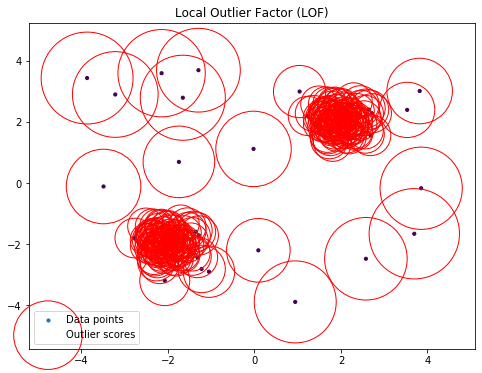

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10., label='Data points')
# plot circles with radius proportional to the outlier scores
#radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
radius = - X_scores
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.title("Local Outlier Factor (LOF)")
legend = plt.legend(loc='lower left')
plt.show()

⚠️ Be careful : sometimes, the LOF is **scaled** for plotting reasons (here, anomalies have a circle radius close to 1, while the normal points have a circle radius close to 0).
```python
LOF = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
```

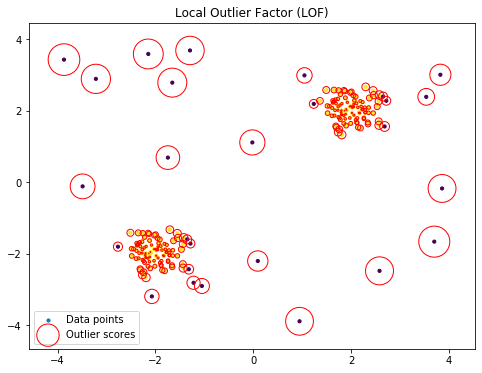

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.title("Local Outlier Factor (LOF)")
legend = plt.legend(loc='lower left')
plt.show()

# IV. Isolation Forest

## IV.1. Intuition

As you could guess, **Isolation Forest (IF)** is an algorithm **based on Random Forests**. Knowing that outliers (anomalous points) are **usually farther** in the distribution of points, decision trees would **need less steps to isolate such a point than a regular point**.

This is well represented in the examples below (where $x_i$ is a regular point and $x_0$ an anomaly):

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1JqhXJAhDd8U_fQgSFLz2OLhvU1LaN-eV" width="800px">
</p>

<p align="center">          
<table><tr><td><img src='https://drive.google.com/uc?export=view&id=1H8Mtrjf4a8FXb-NQuUh9Vq1rIdRp9ZE7' width="400px"></td><td><img src='https://drive.google.com/uc?export=view&id=1RjtJKe0p2q6jbgiEmB9PzkQmR_CCu0mJ' width="400px"></td></tr></table>
</p>

## IV.2. Details

In other words, the Isolation Forest isolates observations by **randomly selecting a feature and then randomly selecting a split value** between the maximum and minimum values of the selected feature.

This **recursive partitioning** can be represented by a tree structure : the **number of splittings required** to isolate a sample is equivalent to the **path length** from the root node to the terminating node. The path length, **averaged over a forest** of such random trees, is a **measure of normality**.

One can compute the path to isolate each point, and compare it to the average path, using the formula:

$${ \displaystyle s(x,n) = \displaystyle2^{ \frac{-mean(h(x))}{c(n)}}}  $$

where:
* $h(x)$ is the path length from root node to node $x$
* $mean(h(x))$ is the average path length over several decision trees
* $c(n)$ is the average path length for all nodes, it's just a normalisation factor

Finally, depending on the value of $s(x)$, three possibilities:
* if $s(x) \approx 1$ , ie $mean(h(x)) \ll c$, x is an anomaly
* if $s(x) \ll 0.5$, ie $mean(h(x)) \gg c$, x is normal
* if $s(x) \approx 0.5$ for all points, there is no distinct anomaly in the data

> 📚 **Resources**: [Read more](https://quantdare.com/isolation-forest-algorithm/) about isolation forests

## IV.3. Implementation with `sklearn`

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X_train.shape, X_test.shape, X_outliers.shape

((200, 2), (40, 2), (20, 2))

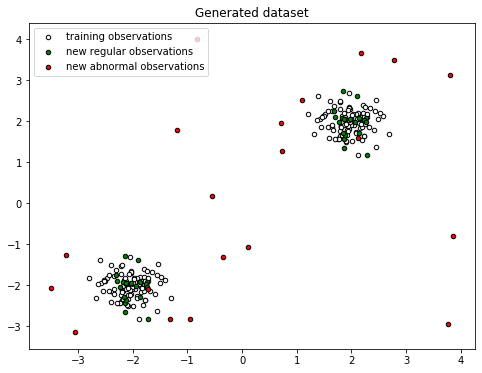

In [11]:
# Plot the dataset
plt.figure(figsize=(8, 6))

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.legend([b1, b2, c],
           ["training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.title("Generated dataset")
plt.show()

In [12]:
# fit the model
clf = IsolationForest(max_samples=100, contamination='auto', behaviour='new')
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

y_pred_train.shape, y_pred_test.shape, y_pred_outliers.shape

((200,), (40,), (20,))

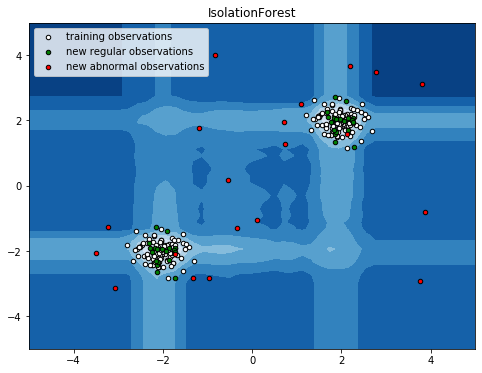

In [13]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.legend([b1, b2, c],
           ["training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

# V. AutoEncoder (to be continued)

Another powerful outlier detection model is called **AutoEncoder**.

It is a **Deep Learning unsupervised technique** that aims to **encode data into a smaller set of features and decode it afterwards**. When an anomaly is encountered, the AutoEncoder does not manage to decode properly, thus meaning the sample is an anomaly.

We will discuss it in more details later. Just remember the architectural structure of an encoder:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=17-vOKFtflpjNDnr9I5D3or_I0k9GV9T0" width="600px" >
</p>

# VI. Algorithms comparison

Let's finally apply what we've just learnt to another example.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

➡️ We generate some training data of normal points. We create two clusters generated randomly through a normal distribution. This makes a **training set** of 2000 data points.

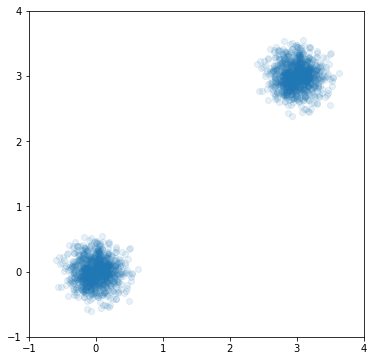

In [15]:
N_POINTS_TRAIN = 1000
DIMENSION = 2

np.random.seed(0)

# 2D gaussian distribution, 0.2 is just a normalization factor
# Actually, we make 2 gaussian distribution, then merge them into a single array
gaussian_train = 0.2 * np.random.randn(N_POINTS_TRAIN, DIMENSION)
X_train = np.concatenate([gaussian_train, gaussian_train + 3])
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

plt.figure(figsize=(6, 6))
plt.scatter(X_train['x1'], X_train['x2'], label='Train', alpha=0.1)
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.show()

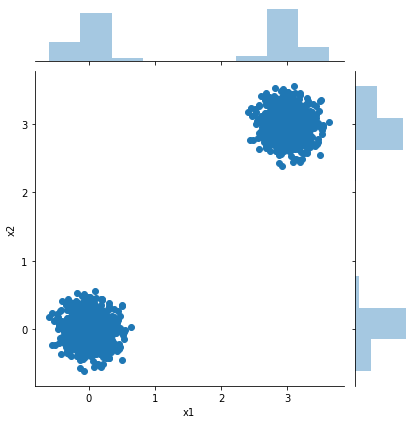

In [16]:
sns.jointplot(X_train["x1"], X_train["x2"],kind="scatter")
plt.show()

➡️ We also generate some testing data composed of normal point and outliers. Inliers are created the same way (using normal distribution) and outliers are created everywhere (using uniform distribution). This creates a **testing set** of 440 testing points (400 normal and 40 outliers).

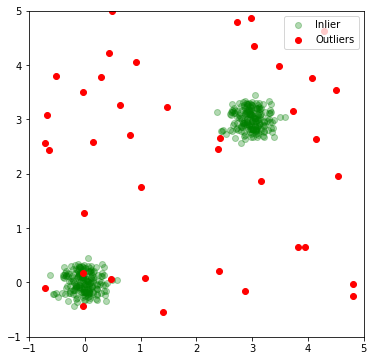

In [17]:
# Generating new, 'normal' observation for test
N_POINTS_TEST = 200
gaussian_test = 0.2 * np.random.randn(N_POINTS_TEST, DIMENSION)
X_test = np.concatenate([gaussian_test + 3, gaussian_test]) #number of test points is 400
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers for test
N_OUTLIERS = 40
X_outliers = np.random.uniform(low=-1, high=5, size=(N_OUTLIERS, DIMENSION))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

# Concatenate normal and outliers distributions for test
X_test_good = pd.concat([X_test, X_outliers])
y = np.zeros(440) #flag normal values as 0
y[400:] = 1 #flag outliers as 1

# Plotting data
plt.figure(figsize=(6, 6))
plt.scatter(X_test['x1'], X_test['x2'], color="g", label='Inlier', alpha=0.3)
plt.scatter(X_outliers['x1'], X_outliers['x2'], color="r", label='Outliers')
plt.legend(loc=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.show()

➡️Based on this created data, we can now try our new detection algorithms.

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score

# Instantiate the models
G = EllipticEnvelope()
LOF = LocalOutlierFactor(contamination="auto", novelty=True) #novelty: allows to find new kind of outliers
IF = IsolationForest(contamination="auto", behaviour="new") #contamination: amount of outliers to determine threshold value for outlier detection ; behaviour new is to match scikit-learn decision_function method in other anomaly detection algorithms 

# Fit the data
G.fit(X_train)
LOF.fit(X_train)
IF.fit(X_train)

# Perform the prediction
ypredG = G.predict(X_test_good)
ypredLOF = LOF.predict(X_test_good)
ypredIF = IF.predict(X_test_good)

# Warning, those algorithms return -1 for anomaly and 1 for normal!!
ypredG[ypredG == 1] = 0
ypredG[ypredG == -1] = 1
ypredLOF[ypredLOF == 1] = 0
ypredLOF[ypredLOF == -1] = 1
ypredIF[ypredIF == 1] = 0
ypredIF[ypredIF == -1] = 1

# Print the results
print("##################\nGaussian results:")
print(classification_report(y, ypredG))

print("##################\nLOF results:")
print(classification_report(y, ypredLOF))

print("##################\nIsolation Forest results:")
print(classification_report(y, ypredIF))

##################
Gaussian results:
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       400
         1.0       0.45      0.85      0.59        40

    accuracy                           0.89       440
   macro avg       0.72      0.87      0.76       440
weighted avg       0.93      0.89      0.91       440

##################
LOF results:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       400
         1.0       0.76      0.93      0.83        40

    accuracy                           0.97       440
   macro avg       0.87      0.95      0.91       440
weighted avg       0.97      0.97      0.97       440

##################
Isolation Forest results:
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81       400
         1.0       0.23      0.97      0.38        40

    accuracy                           0.71       440
   macro avg  

👉🏻In this case, we have achieve a far better result with a LOF ! Can you guess why ?